In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- Diabetes_binary: 0 = no diabetes 1 = prediabetes or diabetes
- HighBP: 0 = no high BP 1 = high BP (BP = Blood Pressure)
- HighChol: 0 = no high cholesterol 1 = high cholesterol
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI: Body Mass Index
- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth: days of poor mental health scale 1-30 days
- PhysHlth: physical illness or injury days in past 30 days scale 1-30
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex: 0 = female 1 = male
- Age: 3-level age category: 'Age': {
            1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49', 
            7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79', 
            13: '80+'
        },
- Education: Education level 1 = Never attended school or only kindergarten 2 = elementary
- Income: Income scale 1-8

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
correlations = df.corr()
correlations

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<AxesSubplot:>

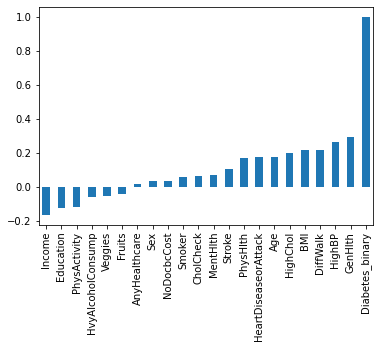

In [6]:
correlations['Diabetes_binary'].sort_values().plot(kind='bar')

In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
#Checking for duplicated 
df.duplicated().sum()

24206

In [9]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [10]:
#Change dtype to int
df = df.astype('int32')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


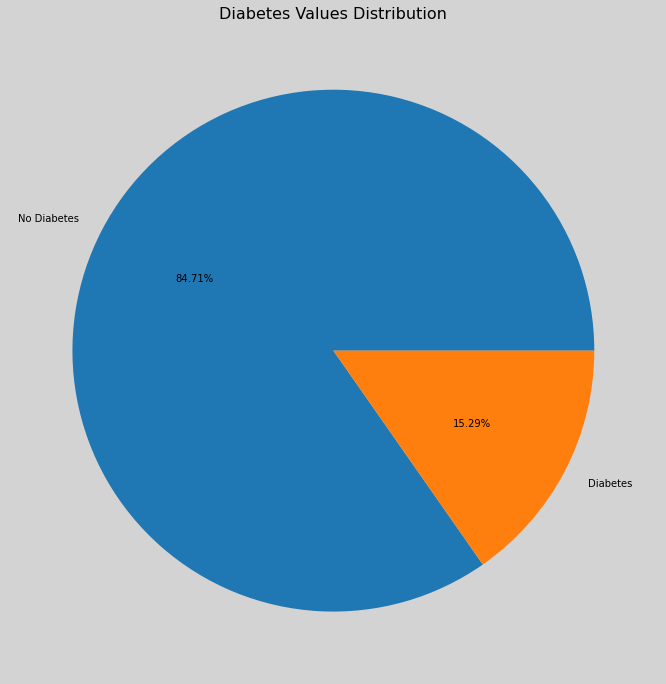

In [11]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(20,12), facecolor='lightgray')
plt.pie(df['Diabetes_binary'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
plt.title('Diabetes Values Distribution', fontsize = 16)
plt.show()

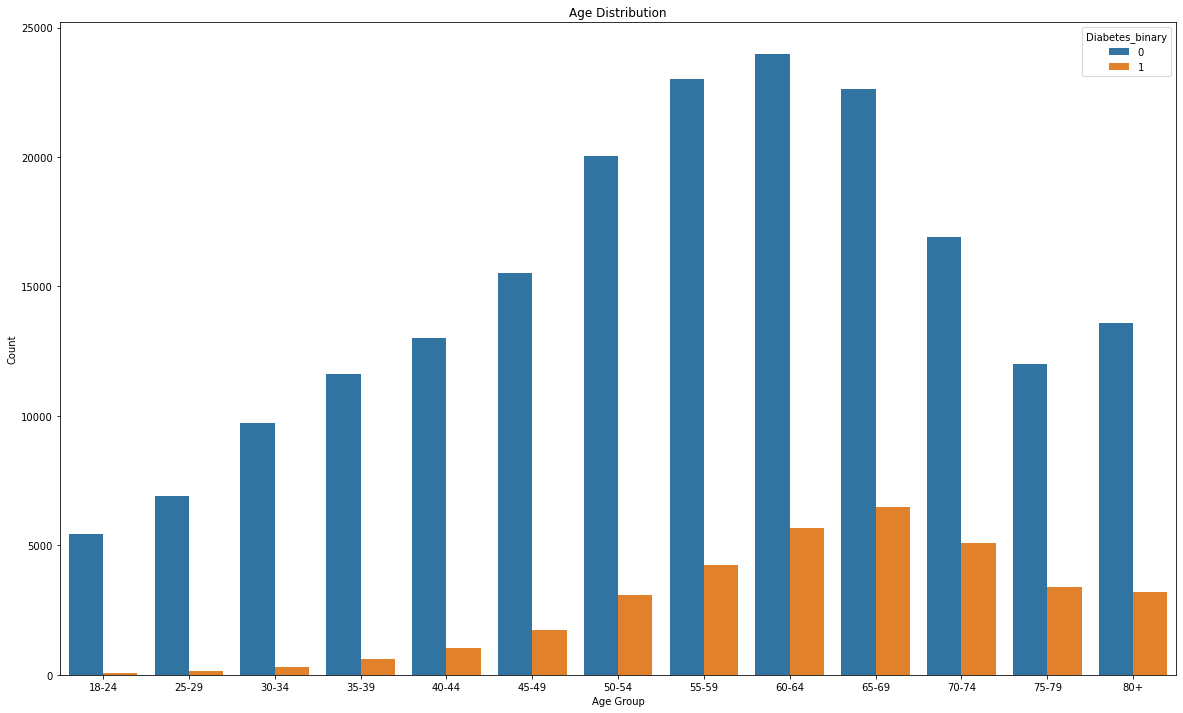

In [12]:
# Age Vs Diabetes distribution
plt.figure(figsize=(20,12))
sns.countplot(x='Age', data=df, hue='Diabetes_binary')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])
plt.show()

In [13]:
diabetic_people = df[df["Diabetes_binary"] == 1]

In [14]:
diabetic_people

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
10,1,0,0,1,25,1,0,0,1,1,...,1,0,3,0,0,0,1,13,6,8
13,1,1,1,1,28,0,0,0,0,0,...,1,0,4,0,0,1,0,11,4,6
17,1,0,0,1,23,1,0,0,1,0,...,1,0,2,0,0,0,1,7,5,6
23,1,1,0,1,27,0,0,0,1,1,...,1,0,1,0,0,0,0,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1,0,1,1,37,0,0,0,0,0,...,1,0,4,0,0,0,0,6,4,1
253668,1,0,1,1,29,1,0,1,0,1,...,1,0,2,0,0,1,1,10,3,6
253670,1,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4


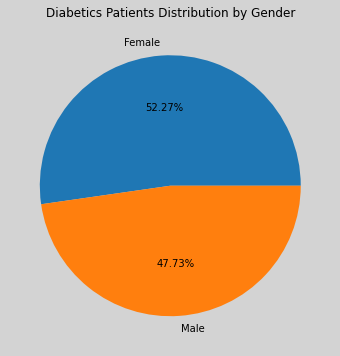

In [15]:
# Plot pie chart to show sex distribution of Diabetes patients
plt.figure(figsize=(10,6), facecolor='lightgray')
plt.pie(diabetic_people['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Patients Distribution by Gender')
plt.show()

Text(0.5, 1.0, 'High Cholesterol with Respect to only Diabetic Patients')

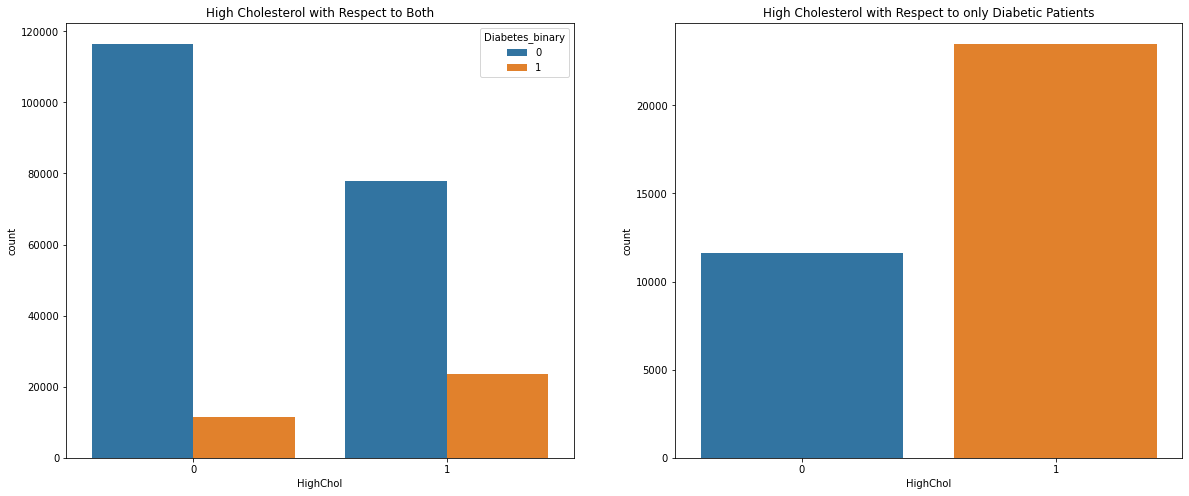

In [16]:
# HighChol and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='HighChol', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('High Cholesterol with Respect to Both')
sns.countplot(x='HighChol', data= diabetic_people, ax=ax[1]).set_title('High Cholesterol with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'Difficulty in Walking with Respect to only Diabetic Patients')

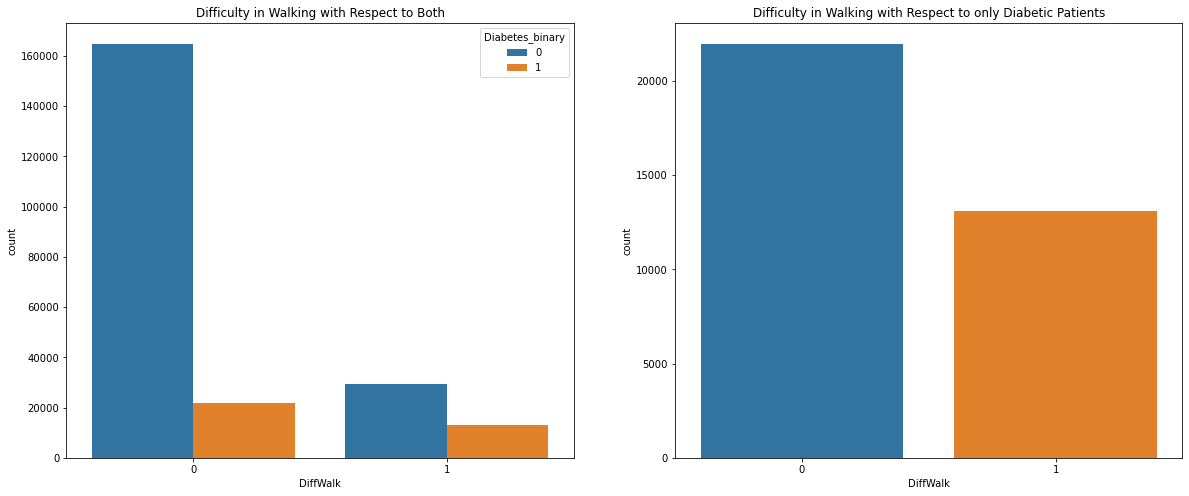

In [17]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('Difficulty in Walking with Respect to Both')
sns.countplot(x='DiffWalk', data= diabetic_people, ax=ax[1]).set_title('Difficulty in Walking with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'HighBP with Respect to only Diabetic Patients')

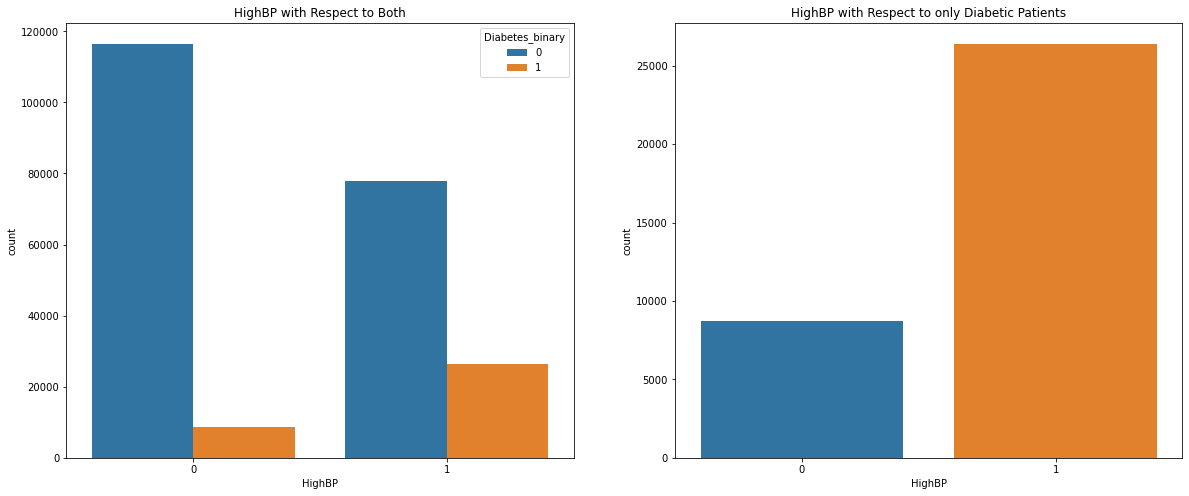

In [18]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='HighBP', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('HighBP with Respect to Both')
sns.countplot(x='HighBP', data= diabetic_people, ax=ax[1]).set_title('HighBP with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'GenHlth with Respect to only Diabetic Patients')

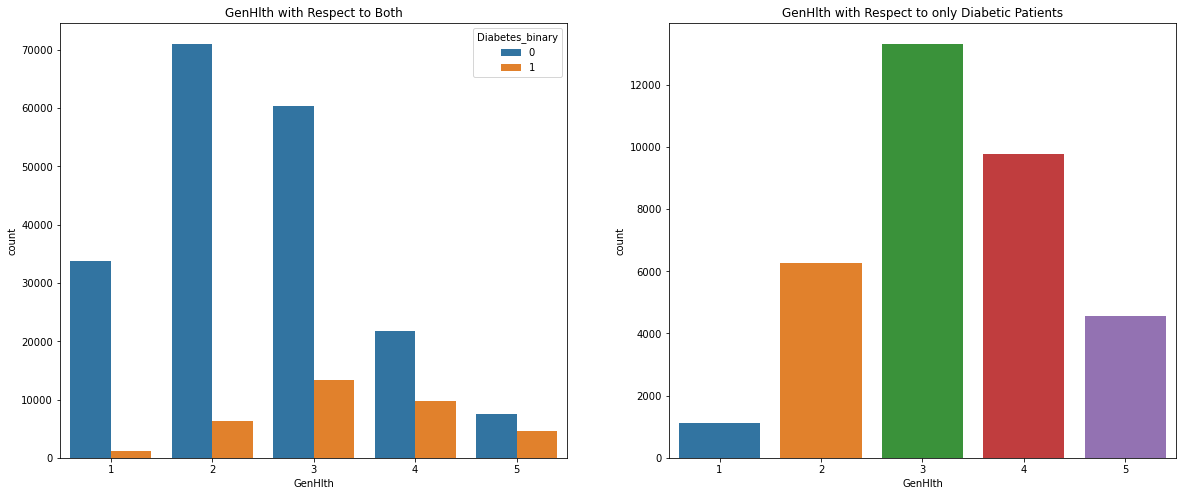

In [19]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='GenHlth', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('GenHlth with Respect to Both')
sns.countplot(x='GenHlth', data= diabetic_people, ax=ax[1]).set_title('GenHlth with Respect to only Diabetic Patients')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

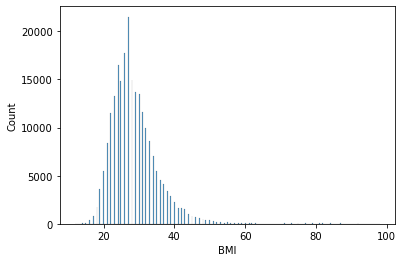

In [20]:
sns.histplot(x=df['BMI'])

#### Model Building

##### Train_Test_Validation Split

In [21]:
X = df.drop(columns="Diabetes_binary")
y = df["Diabetes_binary"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify = y, random_state=42)

# check shapes of split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(206526, 21)
(22948, 21)
(206526,)
(22948,)


In [23]:
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=0.1, stratify = y_train, shuffle=True, random_state=42)

# check shapes of split
print(X_train_train.shape)
print(X_train_validation.shape)
print(y_train_train.shape)
print(y_train_validation.shape)

(185873, 21)
(20653, 21)
(185873,)
(20653,)


In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_train, y_train_train)

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {dummy_clf.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {dummy_clf.score(X_train_validation, y_train_validation) }')

# Performance on training set
print(classification_report(y_train_train, dummy_clf.predict(X_train_train), zero_division=0))

Training set accuracy score: 0.8470568614053682
Validation set accuracy score: 0.847044012976323
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    157445
           1       0.00      0.00      0.00     28428

    accuracy                           0.85    185873
   macro avg       0.42      0.50      0.46    185873
weighted avg       0.72      0.85      0.78    185873



In [25]:
# Performance on validation set
print(classification_report(y_train_validation, dummy_clf.predict(X_train_validation), zero_division=0))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     17494
           1       0.00      0.00      0.00      3159

    accuracy                           0.85     20653
   macro avg       0.42      0.50      0.46     20653
weighted avg       0.72      0.85      0.78     20653



#### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# define and fit 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_train, y_train_train) 

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {decision_tree.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {decision_tree.score(X_train_validation, y_train_validation) }')

Training set accuracy score: 0.9945070020928268
Validation set accuracy score: 0.7727690892364305


#### Overfitting
The result shows overfitting that the accuracy score on training set is 99% but that on validation set is much lower, 64%.

In [27]:
print(classification_report(y_train_train, decision_tree.predict(X_train_train)))
print("__________________________________________________________________________")
print(classification_report(y_train_validation, decision_tree.predict(X_train_validation)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157445
           1       1.00      0.96      0.98     28428

    accuracy                           0.99    185873
   macro avg       1.00      0.98      0.99    185873
weighted avg       0.99      0.99      0.99    185873

__________________________________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     17494
           1       0.28      0.32      0.30      3159

    accuracy                           0.77     20653
   macro avg       0.58      0.59      0.58     20653
weighted avg       0.78      0.77      0.78     20653



In [28]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_validation = X_scaler.transform(X_train_validation)

In [29]:
# Function to plot the results in further sections

def plot_score(title, x_label):
    # Gather the results of different metrics on the classifier performance
    # Define the name of each metric on the figures
    training_scores = [train_acc_score, train_f1_score, train_precision_score, train_recall_score]
    validation_scores = [validation_acc_score, validation_f1_score, validation_precision_score, validation_recall_score]
    label_name = ['accuracy score', 'f1 score', 'precision score', 'recall score']

    # subplots
    fig, ax = plt.subplots(1, 4, figsize=(40, 10))
    axe = ax.ravel()

    # loop through the lists and plot the 3 figures with corresponding data
    for i, scores in enumerate(zip(training_scores, validation_scores)):

        axe[i].plot(list_parameters, scores[0], c='blue')
        axe[i].plot(list_parameters, scores[1], c='red')
        axe[i].set_title('Influence of ' + title + ' on ' + label_name[i])
        axe[i].set_xlabel(x_label)
        axe[i].set_ylabel(label_name[i])

#### Decision Tree Classifier - Effect of maximum depth

In [30]:
# Define the hyperparameters for the experiment (Maximum depth of the decision tree)
list_parameters = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_validation = clf.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

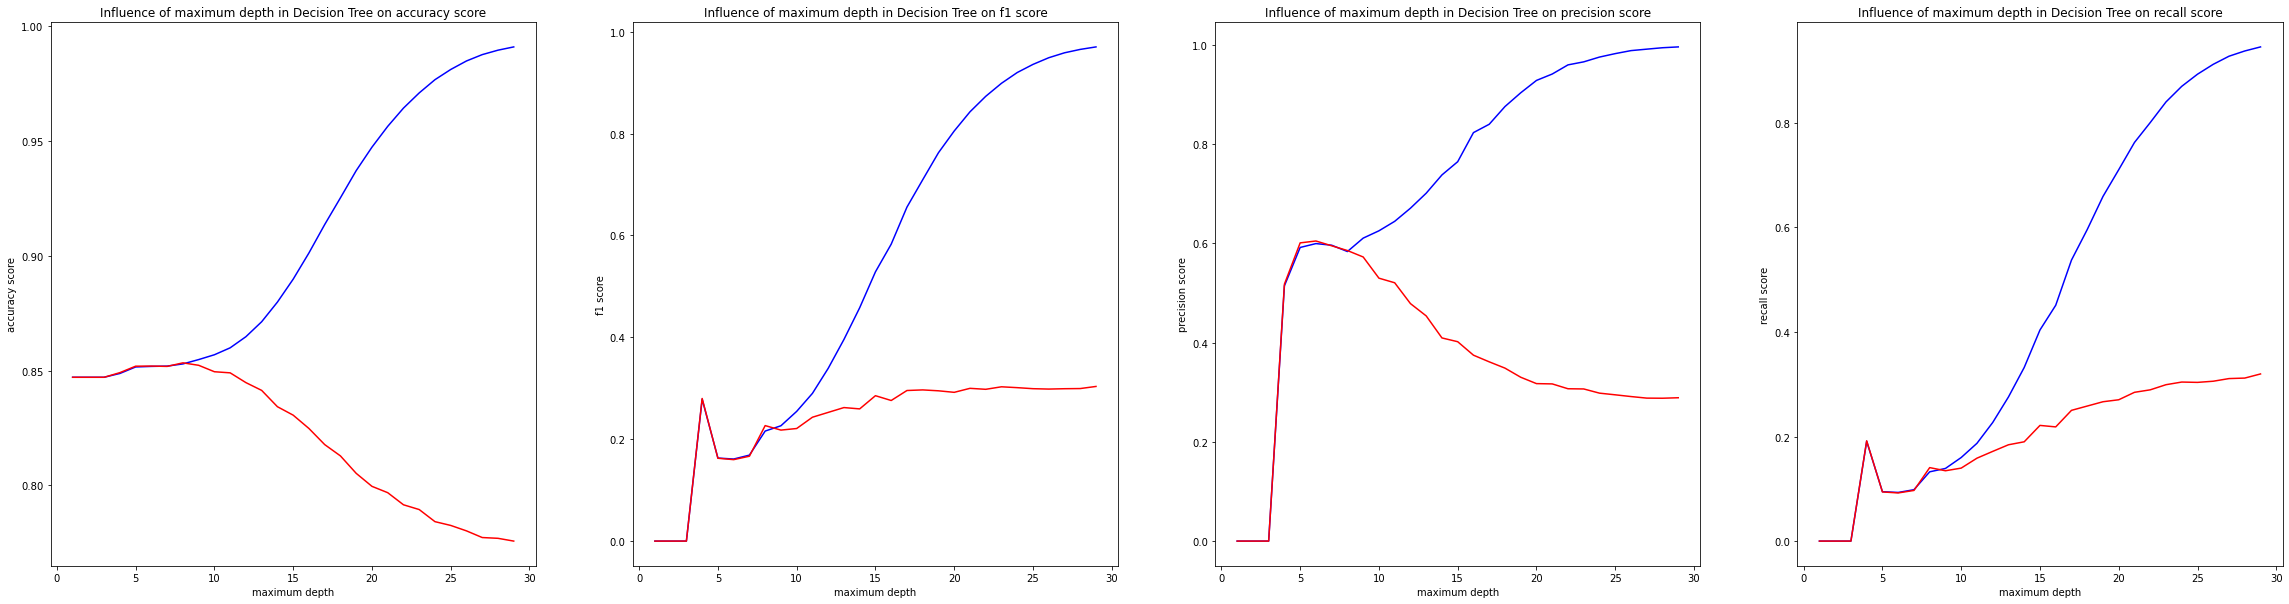

In [31]:
plot_score("maximum depth in Decision Tree", 'maximum depth')

For maximum depth from 1 to around 8, the performance of the model is not stable. But both training and validation set in metrics move in the same direction.
Accuracy scores for both training and validation sets increase
F1 score drop from slightly above 71% to 65%, when maximum depth from 0 to 1, then increase. Recall score is fluctuate, which drops and raise and drop and raise.

However, for maximum depth from 8 to 30, the training scores and validation scores on all metrics move in the different direction.
And the differences increase when the maximum depth increases. The performance is relatively stable after maximum depth reaches 27.

It is clear that overfitting begins at around maximum depth equals to around 8 to 9.

#### Decision Tree Classifier - Effect of Cost Complexity Pruning Parameter

In [32]:
# Define the hyperparameters for the experiment (Cost-Complexity Pruning Parameter of the decision tree)
list_parameters = [x/1000 for x in range(0, 15)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(ccp_alpha=n)
    clf.fit(X_train_train, y_train_train)
    
    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_validation = clf.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

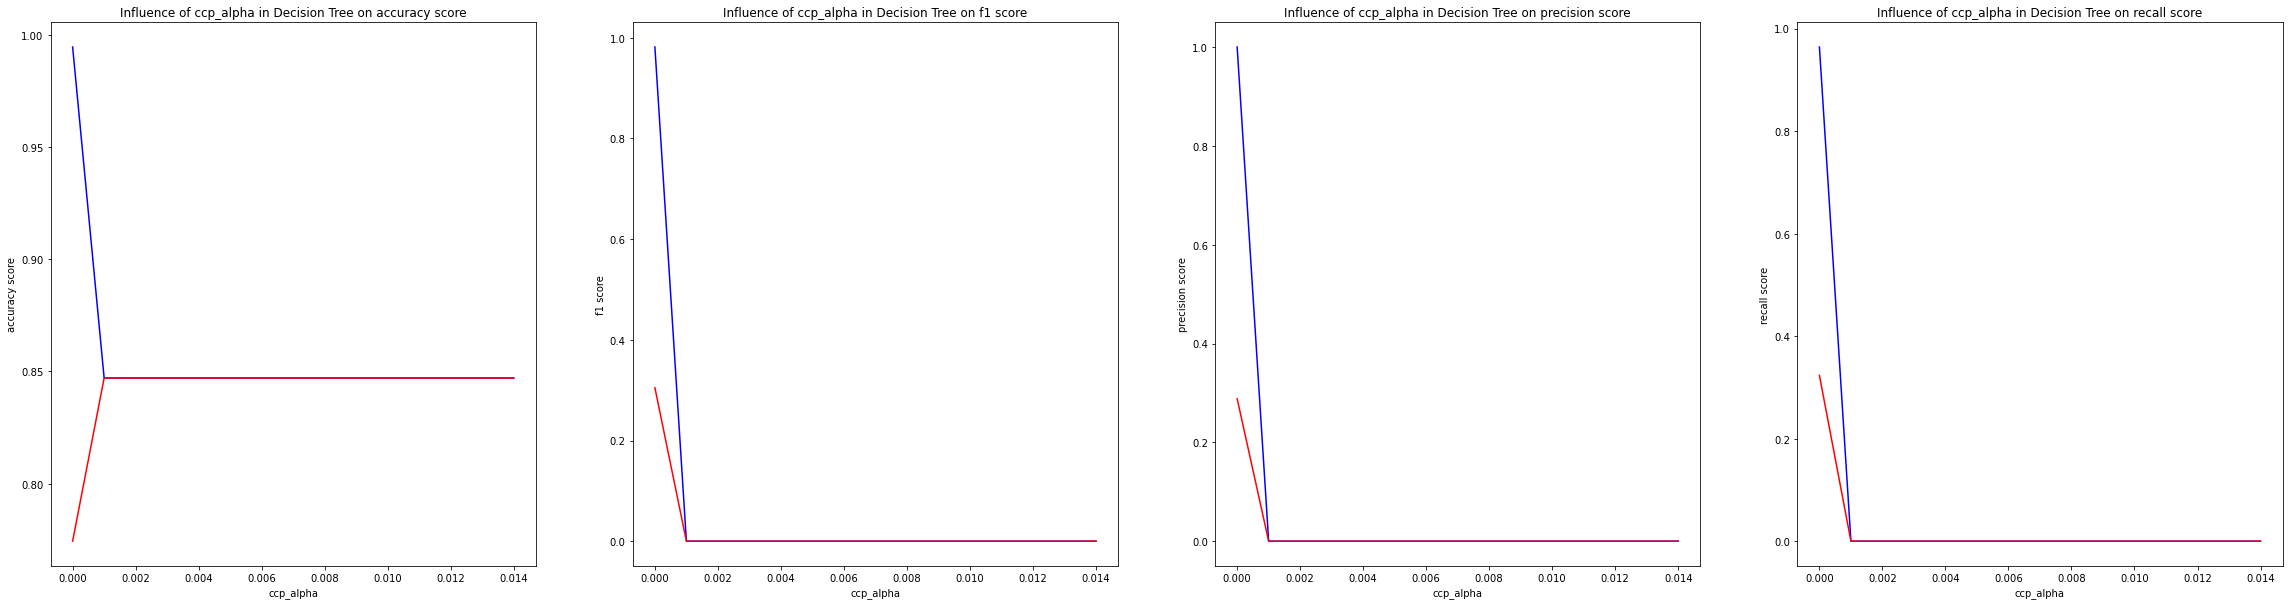

In [33]:
plot_score("ccp_alpha in Decision Tree", 'ccp_alpha')

Cost-complexity pruning score minimixe the difference between the training and validation scores in all three metrics as ccp_alpha increases from 0 to 0.001.

By controlling the maximum depth, smaller value leads to less overfitting. In the example above, 8 would be a reasonable value to deal with overfitting.
"ccp_alpha" even more efficiently handles the overfitting problem. In this case, with ccp_alpha value around 0.002, problem of overfitting is completely eliminated.



#### KNN
##### KNN - Effect of number of nearest neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the hyperparameters for the experiment (number of nearest neighbour of the KNN)
list_parameters = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # Initialize the KNN classifier with k=5 (default)
    knn = KNeighborsClassifier(n_neighbors=n)
    # Train the classifier
    knn.fit(X_train_train, y_train_train)

    # predict classes on training and validation sets
    y_pred_train_train = knn.predict(X_train_train)
    y_pred_train_validation = knn.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

In [ ]:
plot_score("number of neighbors in KNN", "Number of Nearest Neighbour")

The performance of KNN is similar to that of decision tree. The best validation accuracy score in these two models are slightly above 70%.
Yet, the recall score has never reached over 80% as in decision tree.

Overall in all metrics, both training and validation scores move towards the same direction but, due to the different magnitude, overfitting is handled.
Differeence between training and validation scores decrease, when number of nearest neighbour increase.

#### Support Vector Machine
##### SVM - Effect of C

In [ ]:
from sklearn.svm import SVC

In [ ]:
# # Define the hyperparameters for the experiment (number of nearest neighbour of the KNN)
# list_parameters = [*range(1, 10)]

# # Create Empty List for result storage
# train_acc_score, validation_acc_score = [], []
# train_f1_score, validation_f1_score = [], []
# train_precision_score, validation_precision_score = [], []
# train_recall_score, validation_recall_score = [], []

# # Fit in different value of maximum tree depth
# for n in list_parameters:

#     # Initialize the SVM classifier
#     svm_classifier = SVC(C=n)

#     # Train the classifier
#     svm_classifier.fit(X_train_train, y_train_train)

#     # predict classes on training and validation sets
#     y_pred_train_train = svm_classifier.predict(X_train_train)
#     y_pred_train_validation = svm_classifier.predict(X_train_validation)

#     # store results of  metrics on corresponding lists
#     train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
#     validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
#     train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
#     validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
#     train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
#     validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
#     train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
#     validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

In [ ]:
# plot_score("C in Support Vector Machine", "C")

#### Final Model

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Set up the SVM model with polynomial kernel based on grid search parameters
svm_classifier = SVC(C=4, degree=2, gamma='scale', kernel='poly')

pipe_svm = make_pipeline(MinMaxScaler(), svm_classifier)

# Train the classifier
pipe_svm.fit(X_train_train, y_train_train)

# predict classes on training and validation sets
y_pred_train_train = pipe_svm.predict(X_train_train)
y_pred_train_validation = pipe_svm.predict(X_train_validation)

In [ ]:
final_train_acc_score = accuracy_score(y_train_train, y_pred_train_train)
final_validation_acc_score = accuracy_score(y_train_validation, y_pred_train_validation)
final_train_f1_score = f1_score(y_train_train, y_pred_train_train)
final_validation_f1_score = f1_score(y_train_validation, y_pred_train_validation)
final_train_precision_score = precision_score(y_train_train, y_pred_train_train)
final_validation_precision_score = precision_score(y_train_validation, y_pred_train_validation)
final_train_recall_score = recall_score(y_train_train, y_pred_train_train)
final_validation_recall_score = recall_score(y_train_validation, y_pred_train_validation)

In [ ]:
# Print the scores
print("Final Training Accuracy Score:", final_train_acc_score)
print("Final Validation Accuracy Score:", final_validation_acc_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training F1 Score:", final_train_f1_score)
print("Final Validation F1 Score:", final_validation_f1_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training Precision Score:", final_train_precision_score)
print("Final Validation Precision Score:", final_validation_precision_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training Recall Score:", final_train_recall_score)
print("Final Validation Recall Score:", final_validation_recall_score)

In [ ]:
y_pred_test = pipe_svm.predict(X_test)


test_score = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_recall_score = recall_score(y_test, y_pred_test)

In [ ]:
print("Test Accuracy Score:", test_score)
print("Test F1 Score:", test_f1_score)
print("Test Precision Score:", test_precision_score)
print("Test Recall Score:", test_recall_score)

In [ ]:
print(classification_report(y_test, pipe_svm.predict(X_test)))

In [ ]:
X_test_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_validation = X_scaler.transform(X_train_validation)